## Example: Linear regression with Boston dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## The Machine Learning problem

#### Predict outcome on unkown data

Here: predict  `Median value of owner-occupied homes in $1000's` using the rest of attributes.

## Linear regression

Assume that we have three predictors $x_1, x_2, x_3$ which we here often call __input__. Our __output__, that is the value we want to predict, is a continuous variable. Then Linear Regression is a model that predcit the ouput using the formula:

$$y = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$


## Simplified procedure

1. Prepare data
2. Train-test split
3. Model construction.
4. Adjust parameters of the model to training dataset.
5. Evaluate model on test dataset.


In [4]:
# 1. Prepare data
X = boston.data[:, [12]]
y = boston.target

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)

### Break: What we are doing?

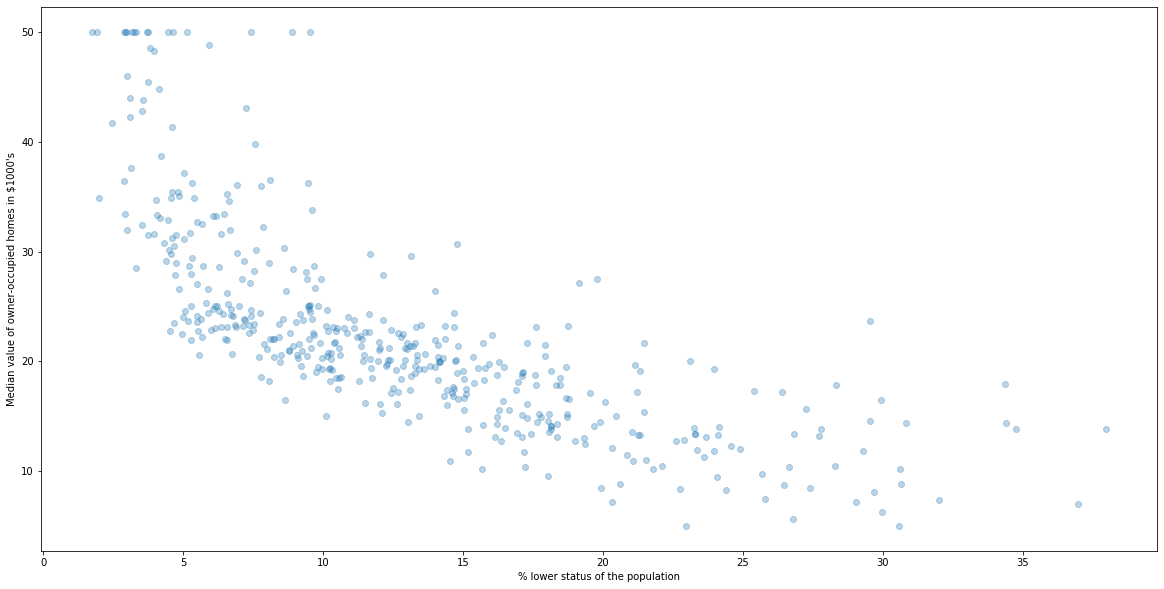

In [5]:
plt.scatter(X_train[:,0], y_train, alpha=0.3)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

In [6]:
# 3. Model construction

from sklearn.linear_model import LinearRegression

skl_linear_model = LinearRegression()

# 4. Adjust parameters of the model to training dataset.
skl_linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Break: what we have done?

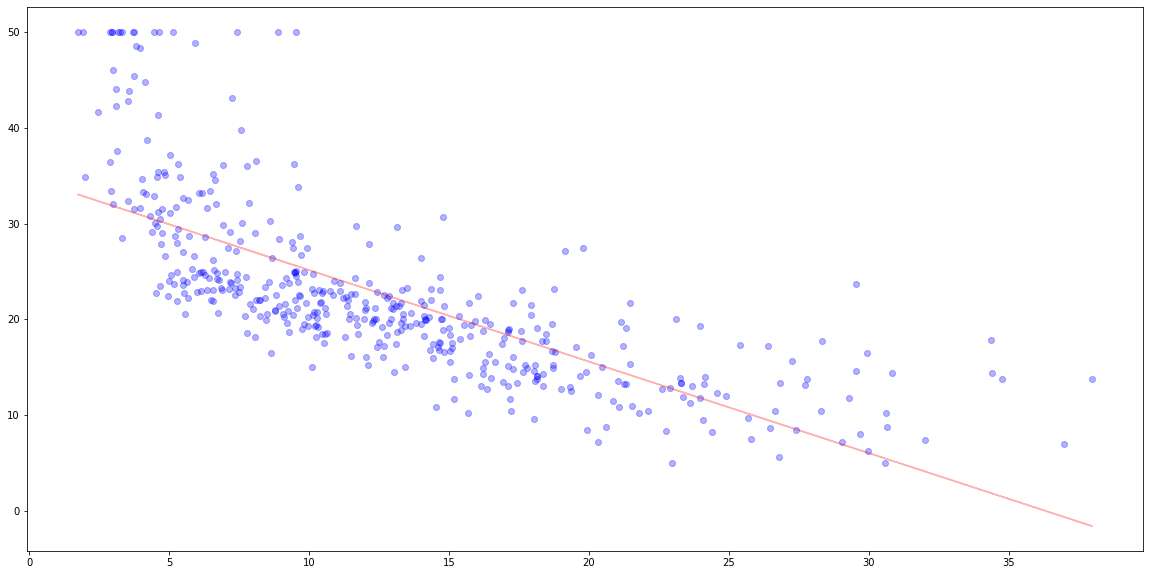

In [7]:
y_train_hat = skl_linear_model.predict(X_train)

# Ploting real data y (blue)
plt.scatter(X_train[:,0], y_train, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.plot(X_train[:,0], y_train_hat, alpha=0.3, c="red")
plt.show()

### Evaluate model on test set

In [8]:
## Evaluate model on test dataset.

from sklearn.metrics import mean_squared_error
y_test_hat = skl_linear_model.predict(X_test)

np.sqrt(np.sqrt(mean_squared_error(y_test, y_test_hat)))

2.3592842618790386

## More complete procedure
1. Prepare data
2. Train-dev-test split
3. Models construction.
4. Adjust parameters of models to training dataset.
5. Evaluate models on dev dataset and choose the best model.
6. Adjust parameters of the best model to the union of training and dev datasets.
7. Evaluate the model on test dataset.


In [9]:
# 1. Prepare data.

X = boston.data
y = boston.target

# 2. Split data into train,  dev and test.
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

In [10]:
# 3. Models construction.

class LRModel:
    
    def __init__(self, columns):
        self.columns = columns
        self.model = LinearRegression()
        
    def fit(self, X, y):
        self.model.fit(X[:, self.columns], y)
        
    def predict(self, X):
        return self.model.predict(X[:, self.columns])

In [11]:
model1 = LRModel([12])


### More models...

# your code...



In [12]:
# 4. Adjust parameters of models to training dataset.
model1.fit(X_train, y_train)

### More models...

# your code...

In [13]:
# 5. Evaluate models on dev dataset and choose the best model.

y_dev_hat = model1.predict(X_dev)
print("model1: ", np.sqrt(np.sqrt(mean_squared_error(y_dev, y_dev_hat))))

### More models...

# your code...

model1:  2.5971734986466903


In [14]:
# 6. Adjust parameters of the best model to the union of training and dev datasets.

# your code...

In [15]:
# 7. Evaluate the model on test dataset.

# your code...

## Pytorch example

We will expain it in details later.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# translate numpy to torch's objects
def torch_X_y(X_train, X_test, y_train, y_test):
    X_train_torch = torch.from_numpy(X_train).float()
    X_test_torch = torch.from_numpy(X_test).float()
    y_train_torch = torch.tensor(y_train).float()
    y_test_torch = torch.tensor(y_test).float()
    return X_train_torch, X_test_torch, y_train_torch, y_test_torch

# 1. Prepare data
X = boston.data[:, [12]]
y = boston.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)
X_train_torch, X_test_torch, y_train_torch, y_test_torch = torch_X_y(X_train, X_test, y_train, y_test)

### Define Model

In [17]:
# predefined linear model 
model = nn.Linear(in_features=1, out_features=1, bias=True)

### Choose loss function and optimizer

In [18]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [19]:
n_epoch = 10000

for i in range(n_epoch):
   # Zero gradients (just in case)
    optimizer.zero_grad()

    # Forward pass, calculate predictions
    y_train_hat = model(X_train_torch) 
    # Calculate loss
    loss = loss_function(y_train_hat, y_train_torch.unsqueeze(1))
    ## Backward propagation
    loss.backward()
    ## Upade weights
    optimizer.step()

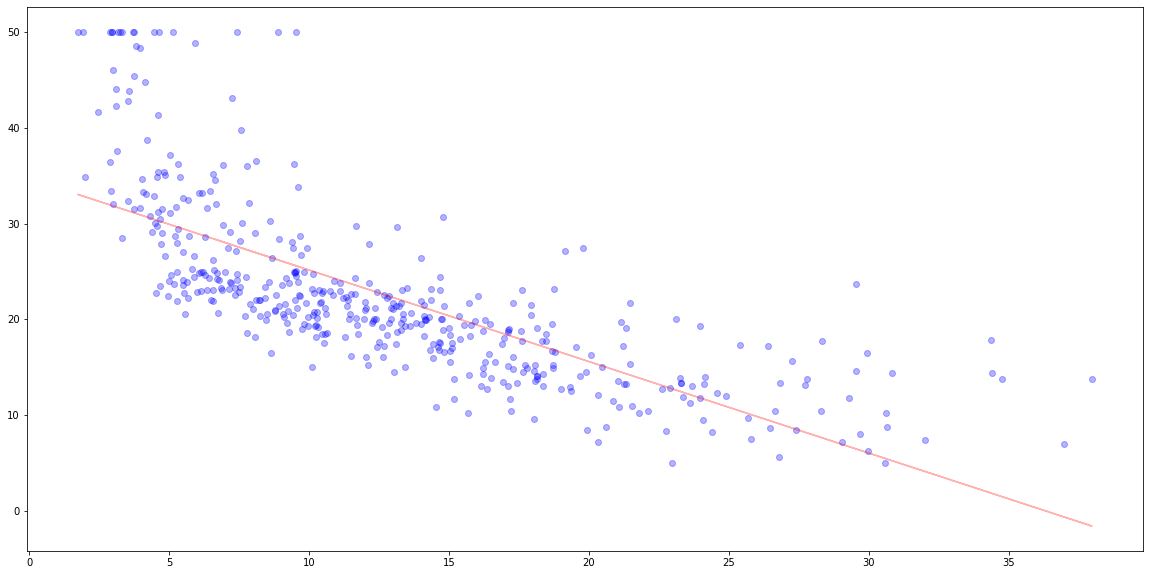

In [20]:
y_train_hat = model(X_train_torch).squeeze().detach().numpy()
y_test_hat = model(X_test_torch).squeeze().detach().numpy()
# Ploting real data y (blue)
plt.scatter(X_train[:,0], y_train, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.plot(X_train, y_train_hat, alpha=0.3, c="red")
plt.show()

## Let's compare parameters

In [21]:
skl_linear_model.coef_

array([-0.95515174])

In [22]:
model.weight

Parameter containing:
tensor([[-0.9552]], requires_grad=True)

# Logistic regression

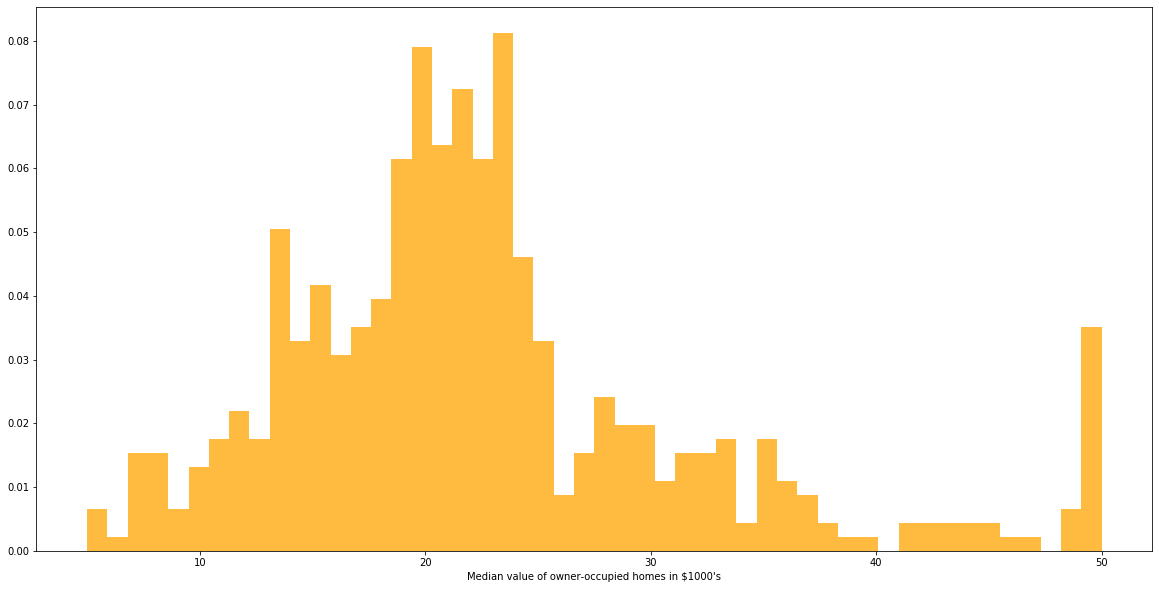

In [23]:
n, bins, patches = plt.hist(y, 50, density=1, facecolor='orange', alpha=0.75)
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.show()

In [24]:
# 1. Prepare data
X = boston.data[:, [0, 12]]
y = boston.target > 25 # if a meadian house value is greater then 25k

In [25]:
import pandas as pd
# just for showing data
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['expensive'] = y
df.head()

,CRIM,LSTAT,expensive
0,0.00632,4.98,False
1,0.02731,9.14,False
2,0.02729,4.03,True
3,0.03237,2.94,True
4,0.06905,5.33,True


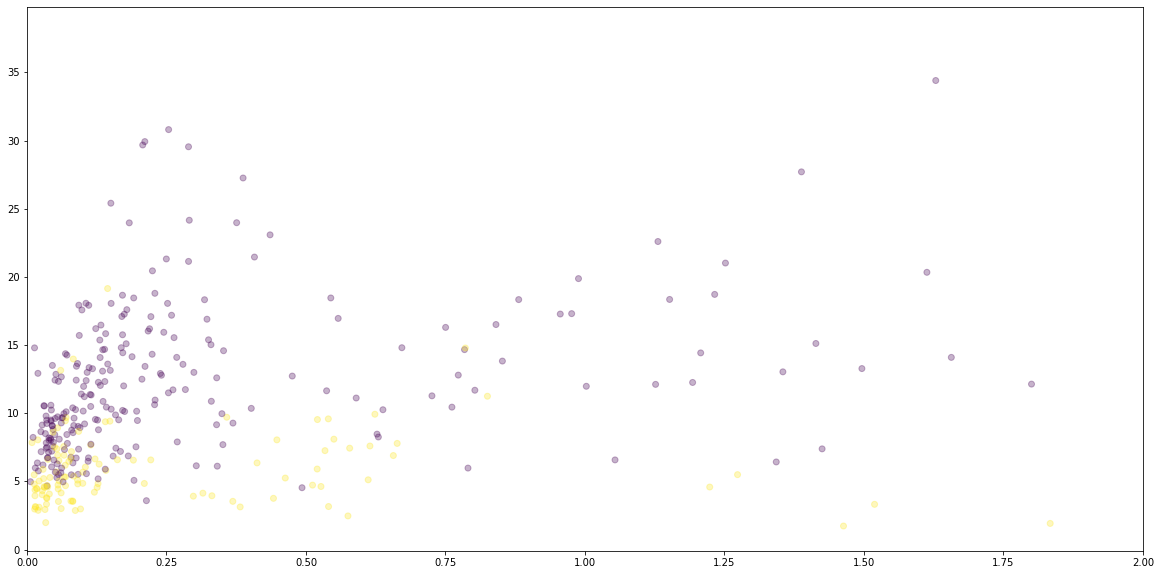

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.xlim(0, 2)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(penalty='none', solver="newton-cg")
logreg_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_hat = logreg_model.predict(X)
y_proba = logreg_model.predict_proba(X)[:, 1]

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification(y, y_hat, y_proba):
    return {
        "Accuracy": accuracy_score(y, y_hat),
        "Precision": precision_score(y, y_hat),
        "Recall": recall_score(y, y_hat),
        "F1-score": f1_score(y, y_hat),
        "AUC": roc_auc_score(y, y_proba),
    }

evaluate_classification(y, y_hat, y_proba)

{'Accuracy': 0.8636363636363636,
 'Precision': 0.7350427350427351,
 'Recall': 0.6935483870967742,
 'F1-score': 0.7136929460580913,
 'AUC': 0.912324776220233}

## Logistic regression: the simples NN

In [30]:
## numpy to torch

X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y.astype(float)).float()

In [31]:
## define model

from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc', nn.Linear(in_features=2, out_features=1, bias=True)),
                      ('sigmoid', nn.Sigmoid())]))

In [32]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [33]:
y_proba = model(X_torch).squeeze().detach().numpy()
y_hat = y_proba > 0.5
evaluate_classification(y, y_hat, y_proba)

{'Accuracy': 0.2509881422924901,
 'Precision': 0.24652087475149106,
 'Recall': 1.0,
 'F1-score': 0.3955342902711324,
 'AUC': 0.09852643134605642}

In [34]:
logreg_model.coef_, model.fc.weight

(array([[ 0.02477726, -0.49706106]]), Parameter containing:
 tensor([[-0.0937,  0.3176]], requires_grad=True))

In [35]:
## Add trainig loop here

### ...